**Importing the required libraries, importing the data set and unzipping the data**

In [13]:
from numpy import loadtxt
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d prateek0x/eye-disorder-dataset

  0% 0.00/4.76M [00:00<?, ?B/s]
100% 4.76M/4.76M [00:00<00:00, 231MB/s]


In [4]:
!unzip "/content/eye-disorder-dataset.zip" -d "/content/"

Archive:  /content/eye-disorder-dataset.zip
  inflating: /content/eye_dataset.csv  


**Defining the model:**

In [5]:
dataset = pd.read_csv('/content/eye_dataset.csv', delimiter=',')
y_label =  pd.get_dummies(dataset['Type']).to_numpy()
x_flat = dataset.iloc[:,1:].to_numpy()
x_pics = np.expand_dims(x_flat.reshape((100,151,332)),3)/255.0
label_dict = dict(zip([2,0,1],dataset['Type'].unique()))


In [6]:
x_pics_train, x_pics_val, y_train, y_val = \
    train_test_split(x_pics, y_label, train_size=0.8,random_state = 42)

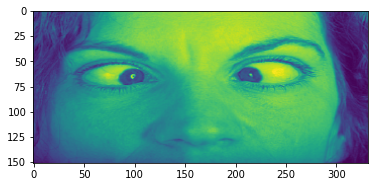

In [9]:
plt.imshow((x_pics[0].squeeze())*255.0)

In [14]:


#Defining the keras model
model = Sequential()
model.add(layers.Conv2D(32, (3,3), input_shape=(151,332,1), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(3, activation='softmax'))

#Compiling keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Fit the model
save_best = ModelCheckpoint('model/', save_best_only=True)
model_hisotry = model.fit(x_pics_train, y_train,validation_data=(x_pics_val, y_val), epochs=20, batch_size=16, callbacks=[save_best])



Epoch 1/20
5/5 [==============================] - 14s 3s/step - loss: 1.4548 - accuracy: 0.3625 - val_loss: 1.0721 - val_accuracy: 0.4500
Epoch 2/20
5/5 [==============================] - 8s 2s/step - loss: 1.0422 - accuracy: 0.5000 - val_loss: 0.9989 - val_accuracy: 0.3500
Epoch 3/20
5/5 [==============================] - 7s 2s/step - loss: 0.9063 - accuracy: 0.5625 - val_loss: 0.8019 - val_accuracy: 0.8000
Epoch 4/20
5/5 [==============================] - 7s 2s/step - loss: 0.7317 - accuracy: 0.7750 - val_loss: 0.7364 - val_accuracy: 0.7000
Epoch 5/20
5/5 [==============================] - 7s 2s/step - loss: 0.4456 - accuracy: 0.8250 - val_loss: 0.6627 - val_accuracy: 0.8500
Epoch 6/20
5/5 [==============================] - 6s 1s/step - loss: 0.3636 - accuracy: 0.8750 - val_loss: 0.9110 - val_accuracy: 0.5500
Epoch 7/20
5/5 [==============================] - 6s 1s/step - loss: 0.2658 - accuracy: 0.9125 - val_loss: 0.7241 - val_accuracy: 0.8500
Epoch 8/20
5/5 [========================

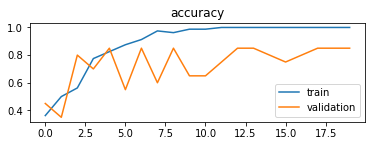

In [15]:
plt.subplot(211)
plt.title('accuracy')
plt.plot(model_hisotry.history['accuracy'], label='train')
plt.plot(model_hisotry.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

In [18]:
#Preictions using the model
predictions = model.predict(x_pics[:80])
pred1 = predictions.argmax(axis=1)

In [19]:
pred_result = []
for x in pred1:
  pred_result.append(label_dict[x])

print('The results are:' , pred_result)


The results are: ['crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'bulk', 'bulk', 'bulk', 'bulk', 'bulk', 'bulk', 'bulk', 'bulk', 'cat', 'bulk', 'bulk', 'bulk', 'bulk', 'bulk', 'bulk', 'bulk', 'bulk', 'crossed', 'bulk', 'bulk', 'bulk', 'bulk', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat']
